In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/Colab Notebooks/DSPG Models/working_shap/house_present"

/content/drive/MyDrive/Colab Notebooks/DSPG Models/working_shap/house_present


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
import cv2
import os
from sklearn.cluster import DBSCAN
!pip install shap
import shap

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
data_dir = os.getcwd()+'/data'

In [7]:
image_size = (256, 256)

X = []
y = []

for subdir in os.listdir(data_dir):
    label = 0 if subdir == 'house_present' else 1
    subdir_path = os.path.join(data_dir, subdir)
    for file in os.listdir(subdir_path):
        image_path = os.path.join(subdir_path, file)
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, image_size)
        X.append(resized_image)
        y.append(label)

X = np.array(X)
y = np.array(y)

print("Loaded image shape:", X.shape)
print("Loaded label shape:", y.shape)


# X = X.reshape(X.shape[0], *image_size, 3).astype("float32") / 255
# y = y.reshape(y.shape[0])
X = X.astype("float32") / 255


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_split_train, x_split_validation, y_split_train, y_split_validation = train_test_split(X_train, y_train, train_size=0.8)


Loaded image shape: (468, 256, 256, 3)
Loaded label shape: (468,)


In [8]:
model = tf.keras.models.load_model('shap_house_present_model.h5')

In [9]:
class_names = ['house_present', 'no_house_present']

In [10]:
X_train.shape[0]

374

In [11]:
background = X_train[np.random.choice(X_train.shape[0], 30, replace=False)]

house_present
1/1 [==============================] - 0s 19ms/step


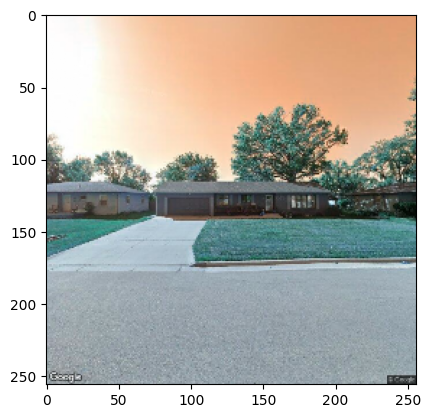

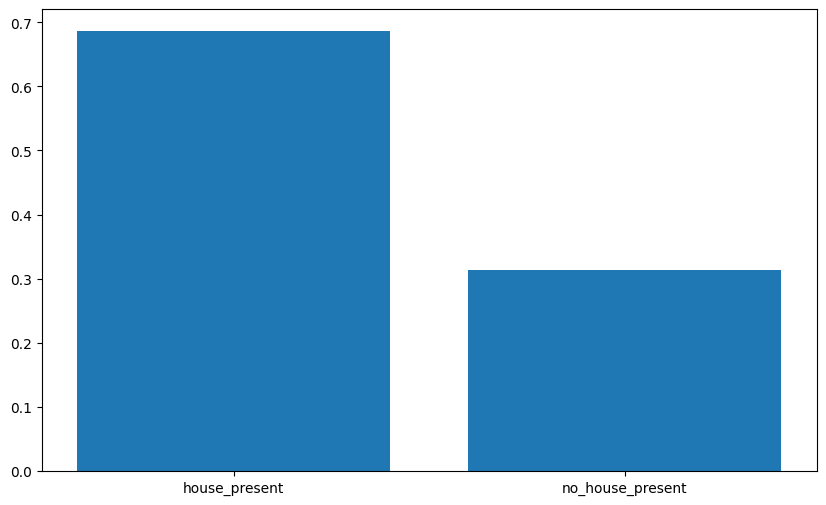

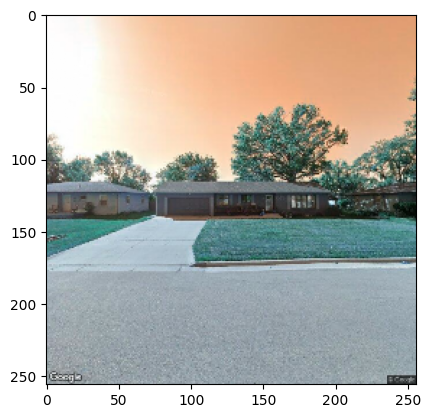

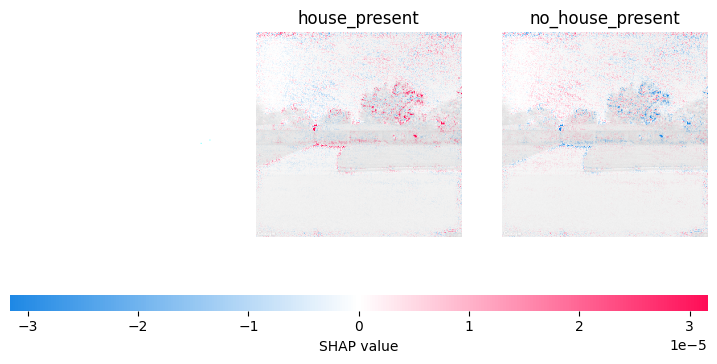

In [16]:
## Training ground

## prediction
i = 5
plt.imshow(X_test[i])
print(class_names[y_test[i]])
predictions = model.predict(X_test[i].reshape(1,256,256,3))
plt.figure(figsize=(10,6))
plt.bar(class_names,predictions[0][:len(class_names)])
plt.show()
## select backgroud for shap

# DeepExplainer to explain predictions of the model
explainer = shap.DeepExplainer(model, background)

# compute shap values

shap_values = explainer.shap_values(X_test[i].reshape(1,256,256,3))
plt.figure()
plt.imshow(X_test[i])
# plot SHAP values
# print()
# shap.image_plot(shap_values, x_test_each_class * 255)
# shap.image_plot(shap_values[0], (X_test[i]*255).reshape(1,256,256,3), labels=class_names)


# shap_values = explainer.shap_values(X_test[i].reshape(1, 32, 32, 3))
# plt.figure()
# plt.imshow(X_test[i])
# num_display = 2  # Set the desired number of graphs to display
# fig, axes = plt.subplots(num_display, 1, figsize=(6, 6*num_display))
# for j in range(num_display):
#     color = shap_values[j][0].sum(axis=2)  # Sum across color channels to get a single intensity value
#     axes[j].imshow(color, cmap=plt.cm.RdBu_r, alpha=0.8, extent=(-1, 1, -1, 1))
#     axes[j].set_title('Class: {}'.format(class_names[j]))
#     axes[j].axis('off')
# plt.tight_layout()
# plt.show()

# shap_values = explainer.shap_values(X_test[i].reshape(1, 256, 256, 3))
# plt.figure()
# plt.imshow(X_test[i])
# num_display = 2  # Set the desired number of graphs to display
# fig, axes = plt.subplots(num_display, 1, figsize=(6, 2*num_display))
# for j in range(num_display):
#     color = shap_values[j][0].sum(axis=2)  # Sum across color channels to get a single intensity value
#     im = axes[j].imshow(color, cmap=plt.cm.RdBu_r, alpha=0.8, extent=(-1, 1, -1, 1))
#     axes[j].set_title('Class: {}'.format(class_names[j]))
#     axes[j].axis('off')
# # Create a colorbar below the subplots
# cax = fig.add_axes([0.2, -0.1, 0.6, 0.03])
# cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
# cbar.set_label('SHAP Value')
# plt.tight_layout()
# plt.show()


shap.image_plot(shap_values, (X_test[i]*255).reshape(1,256,256,3), labels=class_names)
# shap.image_plot(shap_values, (x_test[canidiate_list]*255), labels=class_names)

house_present
1/1 [==============================] - 0s 29ms/step


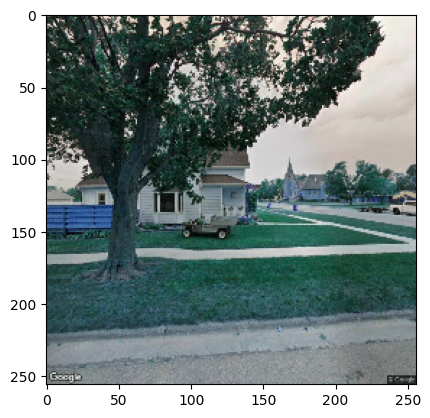

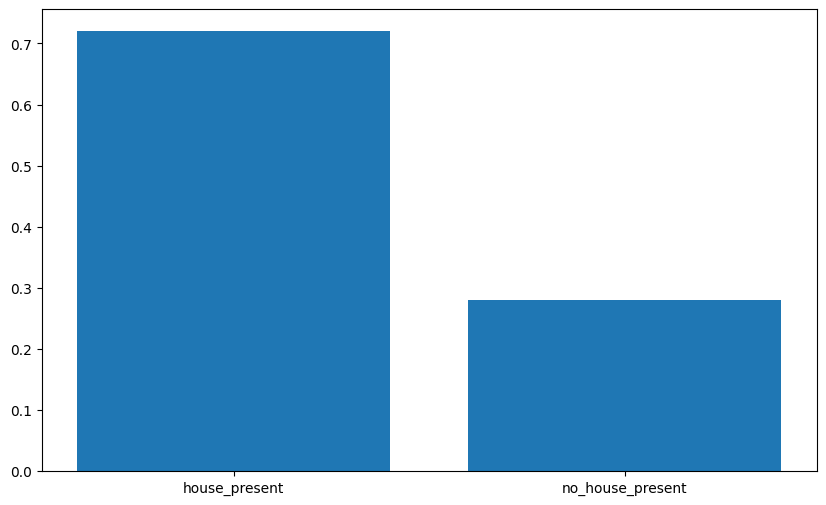

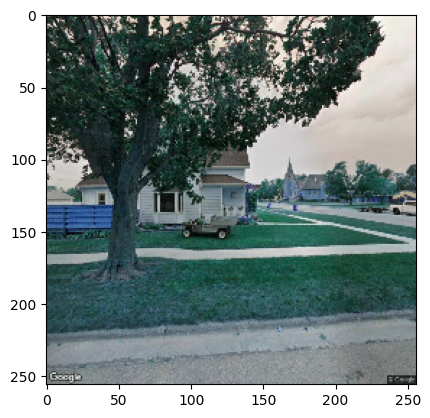

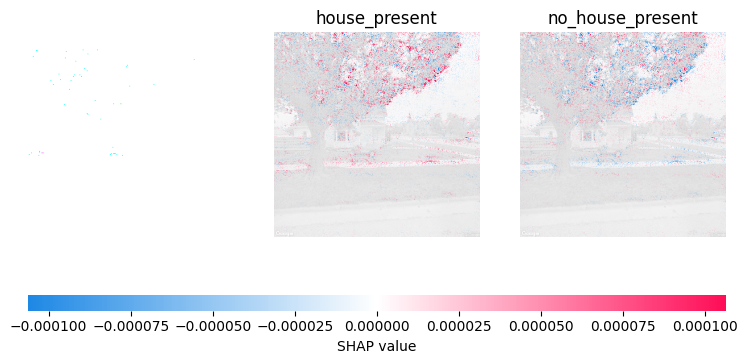

In [13]:
## Training ground

## prediction
i = 1
plt.imshow(X_test[i])
print(class_names[y_test[i]])
predictions = model.predict(X_test[i].reshape(1,256,256,3))
plt.figure(figsize=(10,6))
plt.bar(class_names,predictions[0][:len(class_names)])
plt.show()
## select backgroud for shap

# DeepExplainer to explain predictions of the model
explainer = shap.DeepExplainer(model, background)

# compute shap values

shap_values = explainer.shap_values(X_test[i].reshape(1,256,256,3))
plt.figure()
plt.imshow(X_test[i])
# plot SHAP values
# print()
# shap.image_plot(shap_values, x_test_each_class * 255)
# shap.image_plot(shap_values[0], (X_test[i]*255).reshape(1,256,256,3), labels=class_names)


# shap_values = explainer.shap_values(X_test[i].reshape(1, 32, 32, 3))
# plt.figure()
# plt.imshow(X_test[i])
# num_display = 2  # Set the desired number of graphs to display
# fig, axes = plt.subplots(num_display, 1, figsize=(6, 6*num_display))
# for j in range(num_display):
#     color = shap_values[j][0].sum(axis=2)  # Sum across color channels to get a single intensity value
#     axes[j].imshow(color, cmap=plt.cm.RdBu_r, alpha=0.8, extent=(-1, 1, -1, 1))
#     axes[j].set_title('Class: {}'.format(class_names[j]))
#     axes[j].axis('off')
# plt.tight_layout()
# plt.show()

# shap_values = explainer.shap_values(X_test[i].reshape(1, 256, 256, 3))
# plt.figure()
# plt.imshow(X_test[i])
# num_display = 2  # Set the desired number of graphs to display
# fig, axes = plt.subplots(num_display, 1, figsize=(6, 2*num_display))
# for j in range(num_display):
#     color = shap_values[j][0].sum(axis=2)  # Sum across color channels to get a single intensity value
#     im = axes[j].imshow(color, cmap=plt.cm.RdBu_r, alpha=0.8, extent=(-1, 1, -1, 1))
#     axes[j].set_title('Class: {}'.format(class_names[j]))
#     axes[j].axis('off')
# # Create a colorbar below the subplots
# cax = fig.add_axes([0.2, -0.1, 0.6, 0.03])
# cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
# cbar.set_label('SHAP Value')
# plt.tight_layout()
# plt.show()


shap.image_plot(shap_values, (X_test[i]*255).reshape(1,256,256,3), labels=class_names)
# shap.image_plot(shap_values, (x_test[canidiate_list]*255), labels=class_names)